In [32]:
pip install cufflinks

Note: you may need to restart the kernel to use updated packages.


In [33]:
pip install command

  Created wheel for command: filename=Command-0.1.0-py3-none-any.whl size=6410 sha256=8b1fd594a55177a1c660c907495adb7bb5607d8527ca66ad1fe1939ed717abe4
  Stored in directory: c:\users\sayaan\appdata\local\pip\cache\wheels\a0\cb\b7\42f704db922b07a850570be67e5f92888d132e3b30a914d69e
Successfully built command
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tenserflow

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tenserflow (from versions: none)
ERROR: No matching distribution found for tenserflow


In [113]:
import pandas as pd
import numpy as np
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import cufflinks
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import zipimport
%matplotlib inline
import command

In [11]:
WHR=pd.read_csv('Worldhappinessreport.csv')


In [12]:
WHR.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [13]:
WHR.shape

(158, 12)

In [14]:
print("There are {:,} rows ".format(WHR.shape[0]) + "and {} columns in our data".format(WHR.shape[1]))

There are 158 rows and 12 columns in our data


In [15]:
WHR.set_index('Country', inplace=True)

In [16]:
WHR.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158 entries, Switzerland to Togo
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Region                         158 non-null    object 
 1   Happiness Rank                 158 non-null    int64  
 2   Happiness Score                158 non-null    float64
 3   Standard Error                 158 non-null    float64
 4   Economy (GDP per Capita)       158 non-null    float64
 5   Family                         158 non-null    float64
 6   Health (Life Expectancy)       158 non-null    float64
 7   Freedom                        158 non-null    float64
 8   Trust (Government Corruption)  158 non-null    float64
 9   Generosity                     158 non-null    float64
 10  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 14.8+ KB


In [17]:
WHR.isnull().sum()

Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [18]:
NULLS = WHR[WHR.isnull().any(axis=1)]

In [20]:
NULLS.head()

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,,,


In [21]:
NULLS = WHR[WHR.isnull().any(axis=1)]

In [22]:
WHR.isnull().sum()

Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [23]:
WHR.duplicated().sum()

0

In [24]:
WHR.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [25]:
WHR.sort_values(by="Happiness Rank", ascending=True).head(10)

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,,,
Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425


In [26]:
WHR.sort_values(by="Happiness Rank", ascending=False).head(10)

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,,,
Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726
Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
Burkina Faso,Sub-Saharan Africa,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
Ivory Coast,Sub-Saharan Africa,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
Guinea,Sub-Saharan Africa,150,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172


# Indexing and Grouping

In [27]:
WHR_Region = WHR.groupby('Region')

In [28]:
WHR_Region['Happiness Score'].describe().sort_values(by="mean",ascending=True).head(10)

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Sub-Saharan Africa,40.0,4.202800,0.609557,2.839,3.75600,4.272,4.58075,5.477
Southern Asia,7.0,4.580857,0.570526,3.575,4.39250,4.565,4.94400,5.253
Southeastern Asia,9.0,5.317444,0.950020,3.819,4.87600,5.360,5.77000,6.798
Central and Eastern Europe,29.0,5.332931,0.570446,4.218,4.95900,5.286,5.81300,6.505
Middle East and Northern Africa,20.0,5.406900,1.101382,3.006,4.70775,5.262,6.32400,7.278
Eastern Asia,6.0,5.626167,0.554053,4.874,5.22350,5.729,5.98625,6.298
Latin America and Caribbean,22.0,6.144682,0.728560,4.518,5.84050,6.149,6.64600,7.226
Western Europe,21.0,6.689619,0.824582,4.857,6.30200,6.937,7.37800,7.587
North America,2.0,7.273000,0.217789,7.119,7.19600,7.273,7.35000,7.427


In [29]:
WHR[WHR["Region"]=="Europe"].head()

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,,,


In [97]:
WHR[WHR["Region"]=="Europe"].tail()

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,,,


In [30]:
WHR = WHR.replace('Europe', 'Eastern Europe')

In [31]:
WHR_Region['Happiness Score'].describe().sort_values(by="mean",ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Australia and New Zealand,2.0,7.285000,0.001414,7.284,7.28450,7.285,7.28550,7.286
North America,2.0,7.273000,0.217789,7.119,7.19600,7.273,7.35000,7.427
Western Europe,21.0,6.689619,0.824582,4.857,6.30200,6.937,7.37800,7.587
Latin America and Caribbean,22.0,6.144682,0.728560,4.518,5.84050,6.149,6.64600,7.226
Eastern Asia,6.0,5.626167,0.554053,4.874,5.22350,5.729,5.98625,6.298
Middle East and Northern Africa,20.0,5.406900,1.101382,3.006,4.70775,5.262,6.32400,7.278
Central and Eastern Europe,29.0,5.332931,0.570446,4.218,4.95900,5.286,5.81300,6.505
Southeastern Asia,9.0,5.317444,0.950020,3.819,4.87600,5.360,5.77000,6.798
Southern Asia,7.0,4.580857,0.570526,3.575,4.39250,4.565,4.94400,5.253


In [34]:
WHR_A_NZ = WHR[WHR['Region'] == 'Australia and New Zealand']
WHR_NA = WHR[WHR['Region'] == 'North America']
WHR_WE = WHR[WHR['Region'] == 'Western Europe']
WHR_LA_C = WHR[WHR['Region'] == 'Latin America and Caribbean']
WHR_ME_N_AF = WHR[WHR['Region'] == 'Middle East and Northern Africa']
WHR_C_EE = WHR[WHR['Region'] == 'Central and Eastern Europe']
WHR_SE_A = WHR[WHR['Region'] == 'Southeastern Asia']
WHR_SA = WHR[WHR['Region'] == 'Southern Asia']
WHR_S_S_AF = WHR[WHR['Region'] == 'Sub-Saharan Africa']

In [36]:
len(WHR_A_NZ[WHR_A_NZ['Happiness Score'] > 6])

2

In [39]:
print("There are {} countries in Australia and New Zealand that have a happiness score above 6.0 ".format(len(WHR_A_NZ[WHR_A_NZ['Happiness Score'] > 6])))

There are 2 countries in Australia and New Zealand that have a happiness score above 6.0 


In [38]:
len(WHR_NA[WHR_NA['Happiness Score'] > 6])

2

In [40]:
print("There are {} countries in North America that have a happiness score above 6.0 ".format(len(WHR_NA[WHR_NA['Happiness Score'] > 6])))

There are 2 countries in North America that have a happiness score above 6.0 


In [41]:
len(WHR_WE[WHR_WE['Happiness Score'] > 6])

16

In [42]:
print("There is {} country in Western Europe that has a happiness score above 6.0 ".format(len(WHR_WE[WHR_WE['Happiness Score'] > 6])))

There is 16 country in Western Europe that has a happiness score above 6.0 


In [43]:
len(WHR_LA_C[WHR_LA_C['Happiness Score'] > 6])

13

In [44]:

print("There are {} countries in the Latin America and Caribbean that have a happiness score above 6.0 ".format(len(WHR_LA_C[WHR_LA_C['Happiness Score'] > 6])))

There are 13 countries in the Latin America and Caribbean that have a happiness score above 6.0 


In [45]:
len(WHR_ME_N_AF[WHR_ME_N_AF['Happiness Score'] > 6])

6

In [46]:
print("There are {} countries in the Middle East and Northern Africa that have a happiness score above 6.0 ".format(len(WHR_ME_N_AF[WHR_ME_N_AF['Happiness Score'] > 6])))

There are 6 countries in the Middle East and Northern Africa that have a happiness score above 6.0 


In [47]:
len(WHR_C_EE[WHR_C_EE['Happiness Score'] > 6])

2

In [48]:
print("There are {} countries in the Middle East and Central and Eastern Europe that have a happiness score above 6.0 ".format(len(WHR_C_EE[WHR_C_EE['Happiness Score'] > 6])))

There are 2 countries in the Middle East and Central and Eastern Europe that have a happiness score above 6.0 


In [49]:
len(WHR_SE_A[WHR_SE_A['Happiness Score'] > 6])

2

In [50]:
print("There are {} countries in the Middle East and Central and Southeastern Asia that have a happiness score above 6.0 ".format(len(WHR_SE_A[WHR_SE_A['Happiness Score'] > 6])))

There are 2 countries in the Middle East and Central and Southeastern Asia that have a happiness score above 6.0 


In [51]:
len(WHR_SA[WHR_SA['Happiness Score'] > 6])

0

In [53]:
print("There are {} countries in the Southern Asia that have a happiness score above 6.0 ".format(len(WHR_SA[WHR_SA['Happiness Score'] > 6])))

There are 0 countries in the Southern Asia that have a happiness score above 6.0 


In [54]:
len(WHR_S_S_AF[WHR_S_S_AF['Happiness Score'] > 6])

0

In [59]:
print("There are {} countries in the Sub-Saharan Africa that have a happiness score above 6.0 ".format(len(WHR_S_S_AF[WHR_S_S_AF['Happiness Score'] > 6])))

There are 0 countries in the Sub-Saharan Africa that have a happiness score above 6.0 


In [63]:
Delta_S_S_AF = WHR_S_S_AF.max(axis=0)['Happiness Score'] - WHR_S_S_AF.min(axis=0)['Happiness Score']
print(Delta_S_S_AF)

2.6380000000000003


In [64]:
Delta_A_NZ = WHR_A_NZ.max(axis=0)['Happiness Score'] - WHR_A_NZ.min(axis=0)['Happiness Score']
print(Delta_A_NZ)

0.002000000000000668


In [65]:
Delta_NA = WHR_NA.max(axis=0)['Happiness Score'] - WHR_NA.min(axis=0)['Happiness Score']
print(Delta_NA)

0.3080000000000007


In [66]:
Delta_WE = WHR_WE.max(axis=0)['Happiness Score'] - WHR_WE.min(axis=0)['Happiness Score']
print(Delta_WE)

2.7300000000000004


In [67]:
Delta_LA_C = WHR_LA_C.max(axis=0)['Happiness Score'] - WHR_LA_C.min(axis=0)['Happiness Score']
print(Delta_LA_C)

2.708


In [68]:
Delta_ME_N_AF = WHR_ME_N_AF.max(axis=0)['Happiness Score'] - WHR_ME_N_AF.min(axis=0)['Happiness Score']
print(Delta_ME_N_AF)

4.271999999999999


In [69]:
Delta_C_EE = WHR_C_EE.max(axis=0)['Happiness Score'] - WHR_C_EE.min(axis=0)['Happiness Score']
print(Delta_C_EE)

2.287


In [70]:
Delta_SE_A = WHR_SE_A.max(axis=0)['Happiness Score'] - WHR_SE_A.min(axis=0)['Happiness Score']
print(Delta_SE_A)

2.978999999999999


In [71]:
Delta_SA = WHR_SA.max(axis=0)['Happiness Score'] - WHR_SA.min(axis=0)['Happiness Score']
print(Delta_SA)

1.677999999999999


In [72]:
Delta_S_S_AF = WHR_S_S_AF.max(axis=0)['Happiness Score'] - WHR_S_S_AF.min(axis=0)['Happiness Score']
print(Delta_S_S_AF)

2.6380000000000003


In [73]:
Deltas = {}

In [74]:
Deltas["Australia and New Zealand"] = Delta_A_NZ
Deltas["North America"] = Delta_NA
Deltas["Western Europe"] = Delta_WE
Deltas["Latin America and Caribbean"] = Delta_LA_C
Deltas["Middle East and Northern Africa"] = Delta_ME_N_AF
Deltas["Central and Eastern Europe"] = Delta_C_EE
Deltas["Southeastern Asia"] = Delta_SE_A
Deltas["Southern Asia"] = Delta_SA
Deltas["Sub-Saharan Africa"] = Delta_S_S_AF


In [75]:
print("The {} region seems to have the largest range of happiness scores".format(max(Deltas, key=Deltas.get)))

The Middle East and Northern Africa region seems to have the largest range of happiness scores


# Barplot of the happiness score

Text(0.5, 1.0, 'Happiness Score of the top 10 Countries')

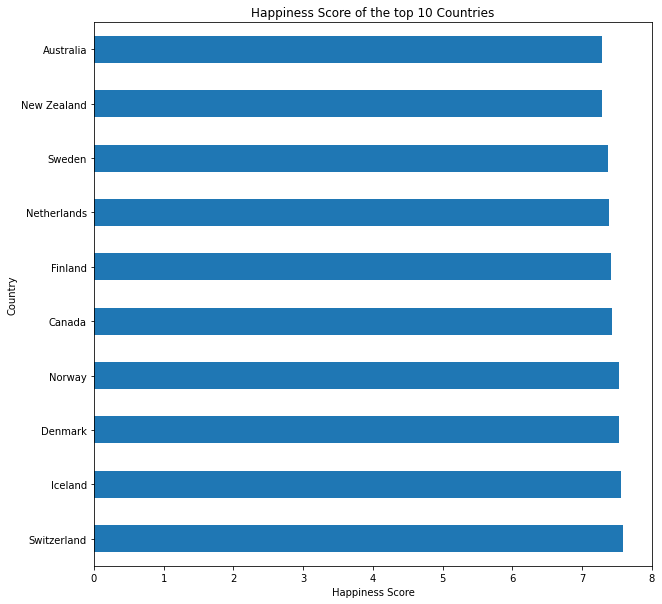

In [76]:
WHR['Happiness Score'].head(10).plot(xticks=np.arange(9), kind='barh', figsize= (10, 10))
plt.xlabel("Happiness Score")
plt.title('Happiness Score of the top 10 Countries')

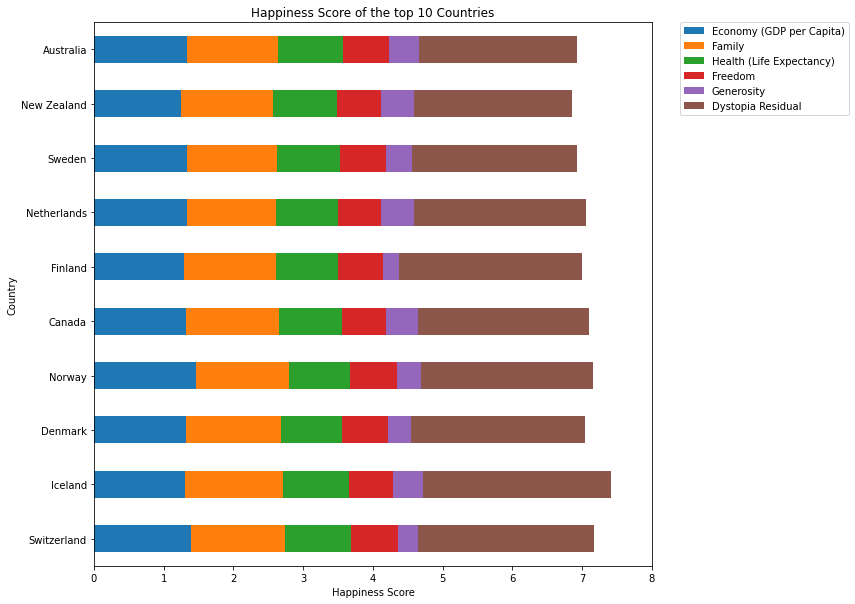

In [79]:
WHR[['Economy (GDP per Capita)', 'Family','Health (Life Expectancy)', 'Freedom', 'Generosity',  'Dystopia Residual']].head(10).plot(kind='barh',
                                                                xticks=np.arange(9), stacked=True, figsize= (10, 10))

plt.xlabel("Happiness Score")
plt.title('Happiness Score of the top 10 Countries')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

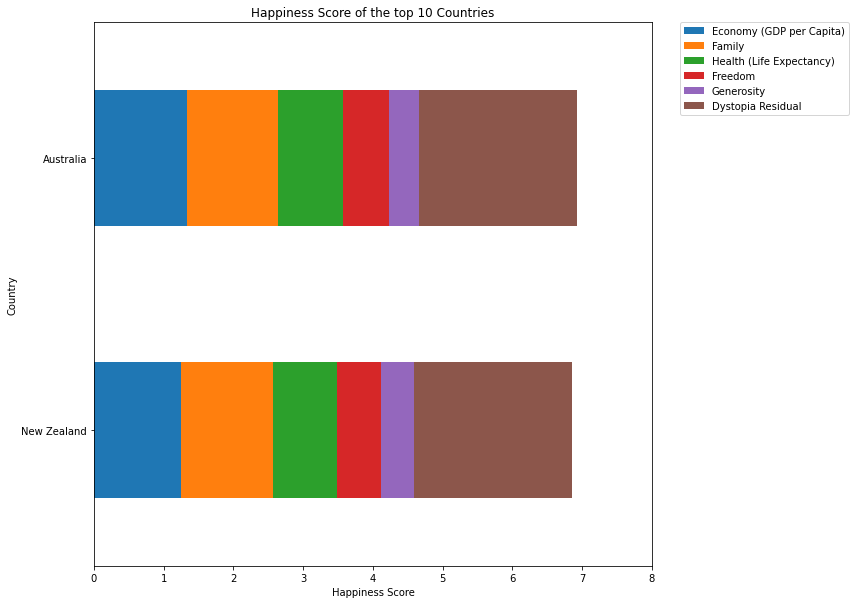

In [81]:
WHR_A_NZ[['Economy (GDP per Capita)', 'Family','Health (Life Expectancy)', 'Freedom', 'Generosity', 'Dystopia Residual']].head(10).plot(kind='barh',
                                                                xticks=np.arange(9), stacked=True, figsize= (10, 10))

plt.xlabel("Happiness Score")
plt.title('Happiness Score of the top 10 Countries')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

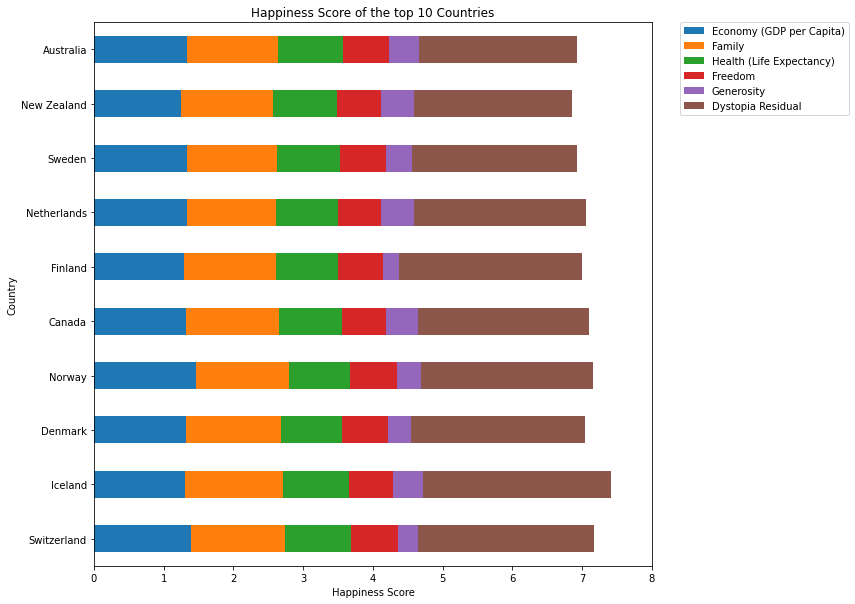

In [83]:
WHR[['Economy (GDP per Capita)', 'Family','Health (Life Expectancy)', 'Freedom', 'Generosity', 'Dystopia Residual']].head(10).plot(kind='barh',
                                                                xticks=np.arange(9), stacked=True, figsize= (10, 10))

plt.xlabel("Happiness Score")
plt.title('Happiness Score of the top 10 Countries')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

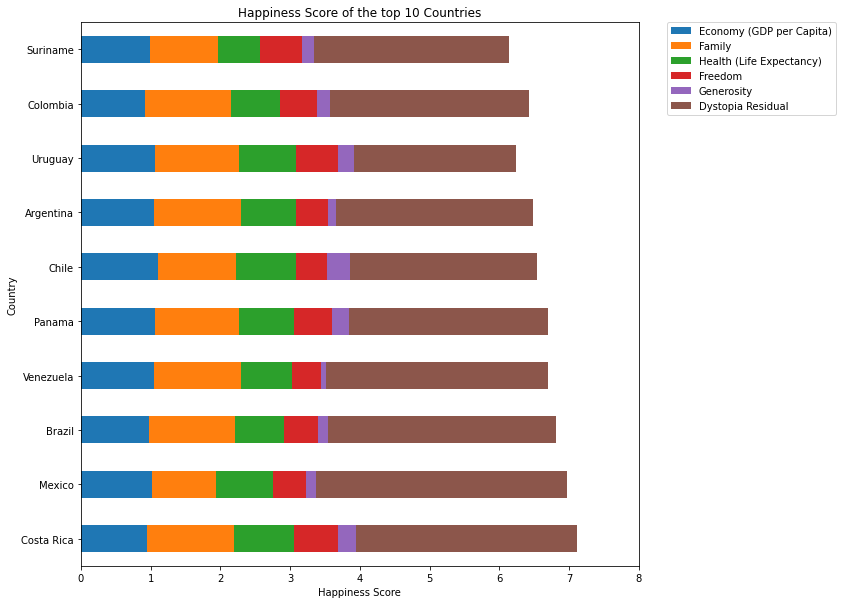

In [84]:
WHR_LA_C[['Economy (GDP per Capita)', 'Family','Health (Life Expectancy)', 'Freedom', 'Generosity', 'Dystopia Residual']].head(10).plot(kind='barh',
                                                                xticks=np.arange(9), stacked=True, figsize= (10, 10))

plt.xlabel("Happiness Score")
plt.title('Happiness Score of the top 10 Countries')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

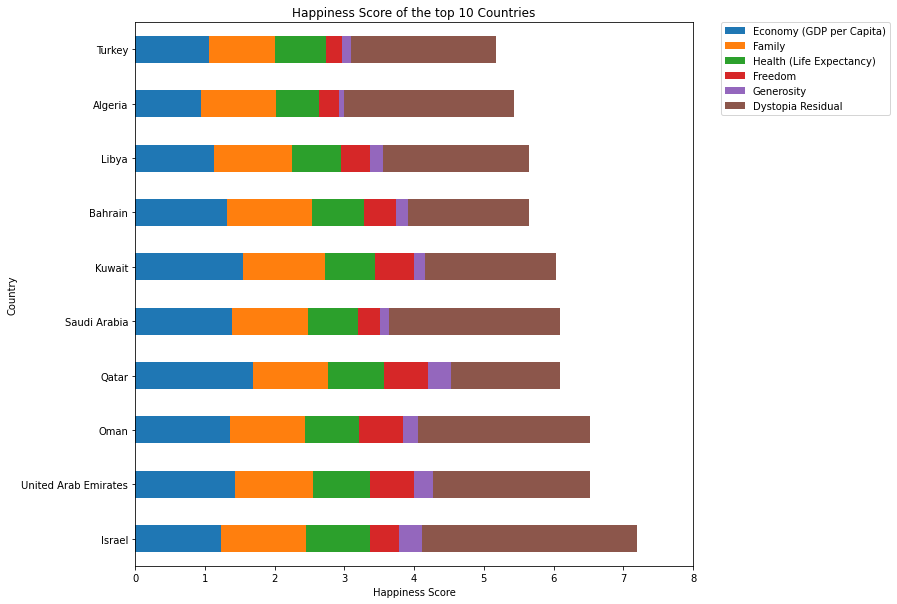

In [85]:
WHR_ME_N_AF[['Economy (GDP per Capita)', 'Family','Health (Life Expectancy)', 'Freedom', 'Generosity', 'Dystopia Residual']].head(10).plot(kind='barh',
                                                                xticks=np.arange(9), stacked=True, figsize= (10, 10))

plt.xlabel("Happiness Score")
plt.title('Happiness Score of the top 10 Countries')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

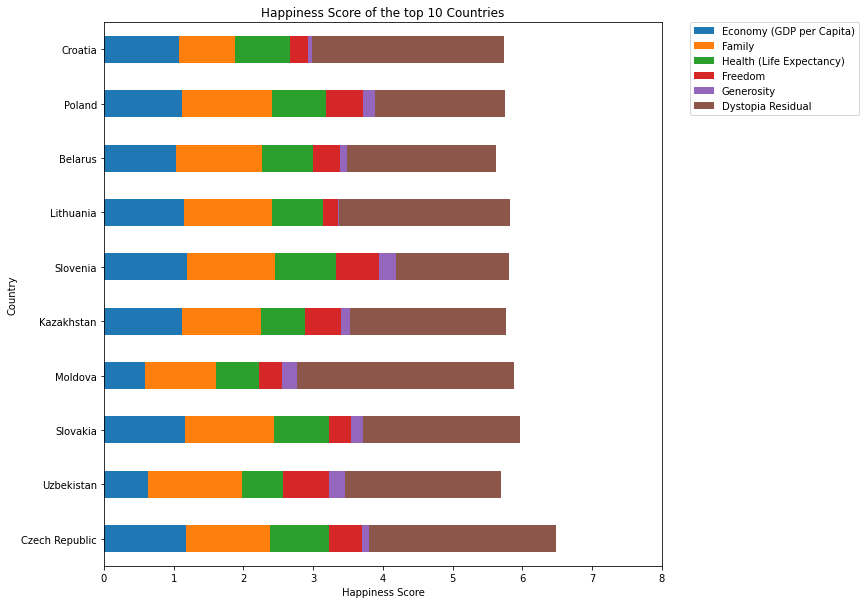

In [86]:
WHR_C_EE[['Economy (GDP per Capita)', 'Family','Health (Life Expectancy)', 'Freedom', 'Generosity', 'Dystopia Residual']].head(10).plot(kind='barh',
                                                                xticks=np.arange(9), stacked=True, figsize= (10, 10))

plt.xlabel("Happiness Score")
plt.title('Happiness Score of the top 10 Countries')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

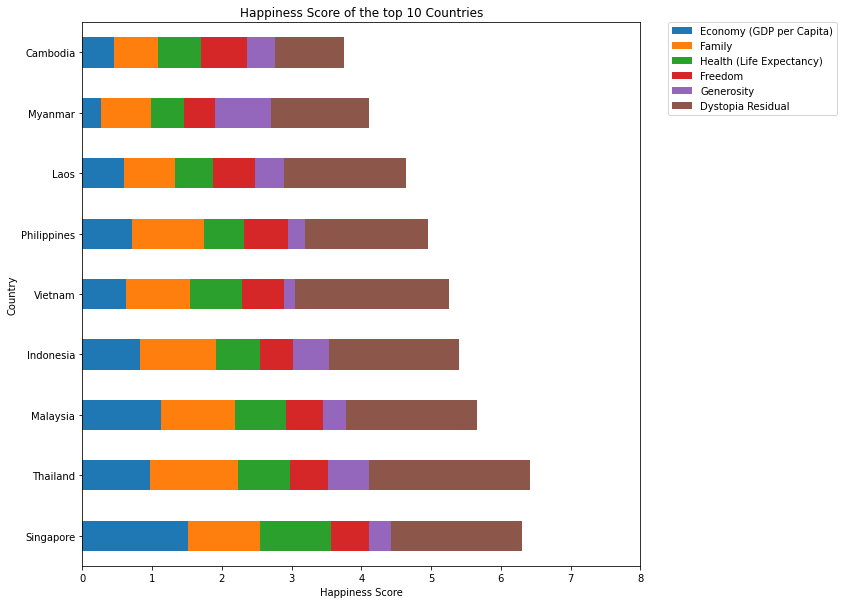

In [87]:
WHR_SE_A[['Economy (GDP per Capita)', 'Family','Health (Life Expectancy)', 'Freedom', 'Generosity', 'Dystopia Residual']].head(10).plot(kind='barh',
                                                                xticks=np.arange(9), stacked=True, figsize= (10, 10))

plt.xlabel("Happiness Score")
plt.title('Happiness Score of the top 10 Countries')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

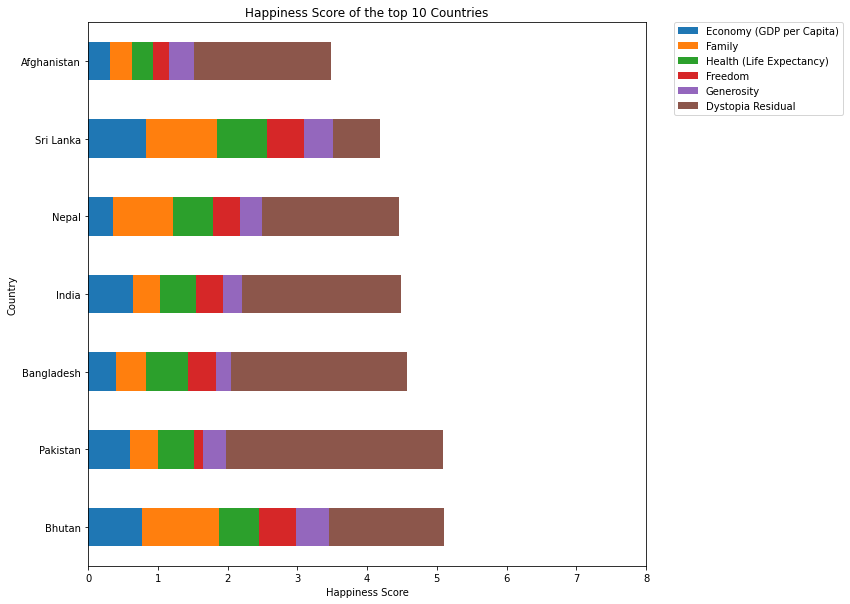

In [88]:
WHR_SA[['Economy (GDP per Capita)', 'Family','Health (Life Expectancy)', 'Freedom', 'Generosity', 'Dystopia Residual']].head(10).plot(kind='barh',
                                                                xticks=np.arange(9), stacked=True, figsize= (10, 10))

plt.xlabel("Happiness Score")
plt.title('Happiness Score of the top 10 Countries')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

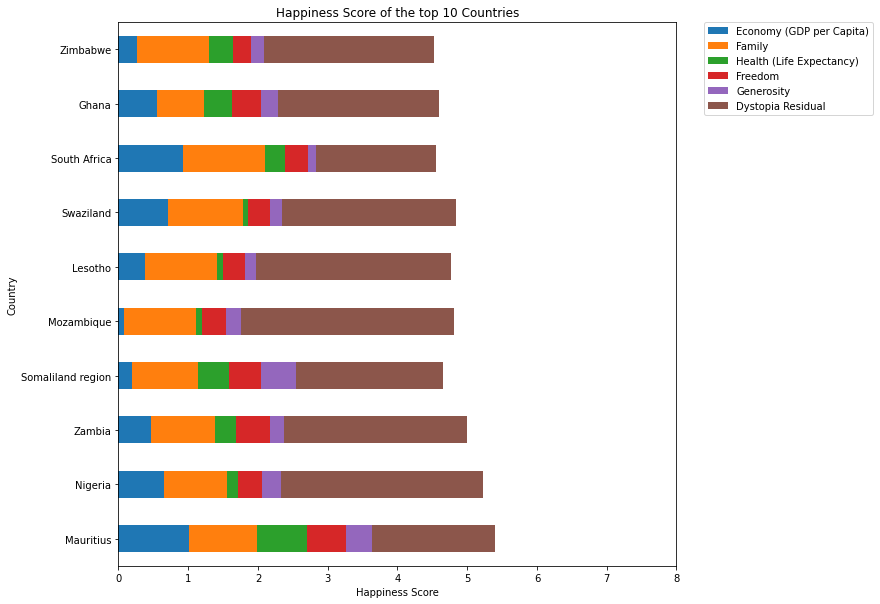

In [89]:
WHR_S_S_AF[['Economy (GDP per Capita)', 'Family','Health (Life Expectancy)', 'Freedom', 'Generosity', 'Dystopia Residual']].head(10).plot(kind='barh',
                                                                xticks=np.arange(9), stacked=True, figsize= (10, 10))

plt.xlabel("Happiness Score")
plt.title('Happiness Score of the top 10 Countries')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [90]:
# Distribution of job satisfaction

Text(0.5, 1.0, 'Freedom ')

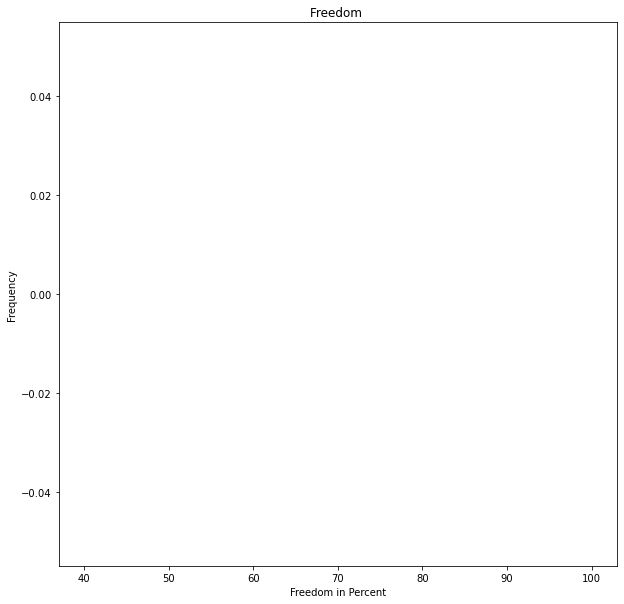

In [98]:
WHR_S_S_AF['Freedom'].plot(kind='hist', bins=[ 40, 50, 60, 70, 80, 90, 100], figsize=(10,10))

plt.xlabel("Freedom in Percent")
plt.title("Freedom ")

In [99]:
#Pairwsise Scatterplots

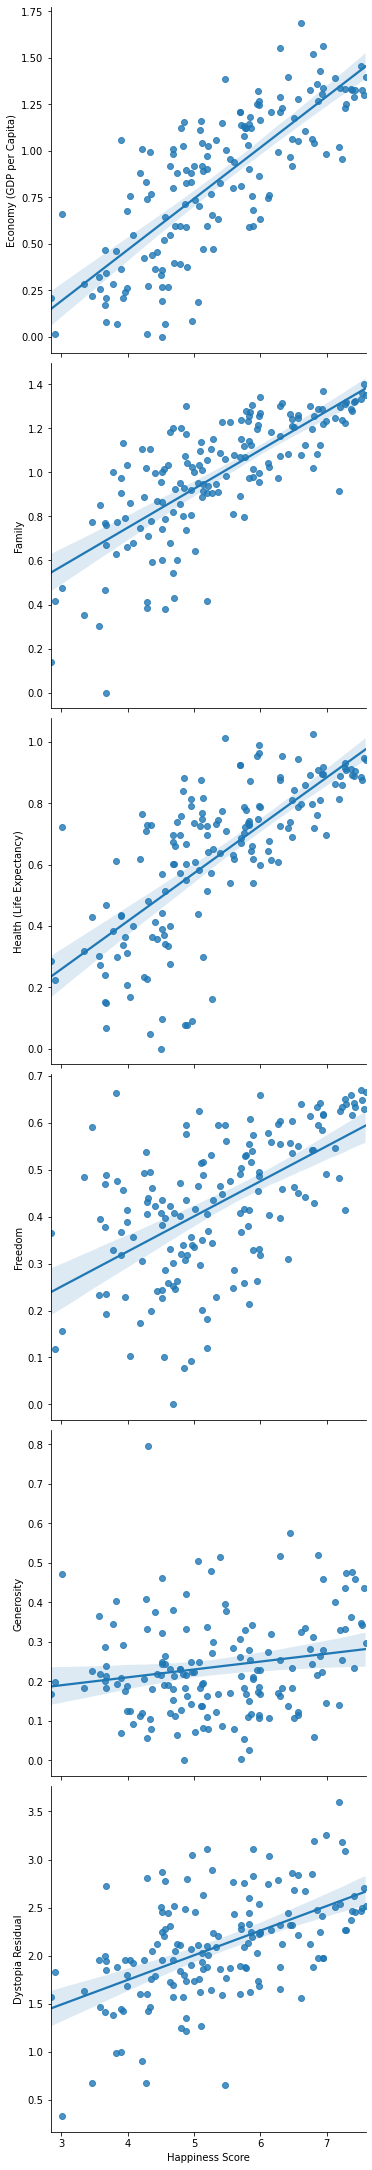

In [100]:
sns.pairplot(data=WHR, kind='reg', size = 5,
                  x_vars=['Happiness Score'],
                  y_vars=['Economy (GDP per Capita)', 'Family','Health (Life Expectancy)', 'Freedom', 'Generosity', 'Dystopia Residual'])

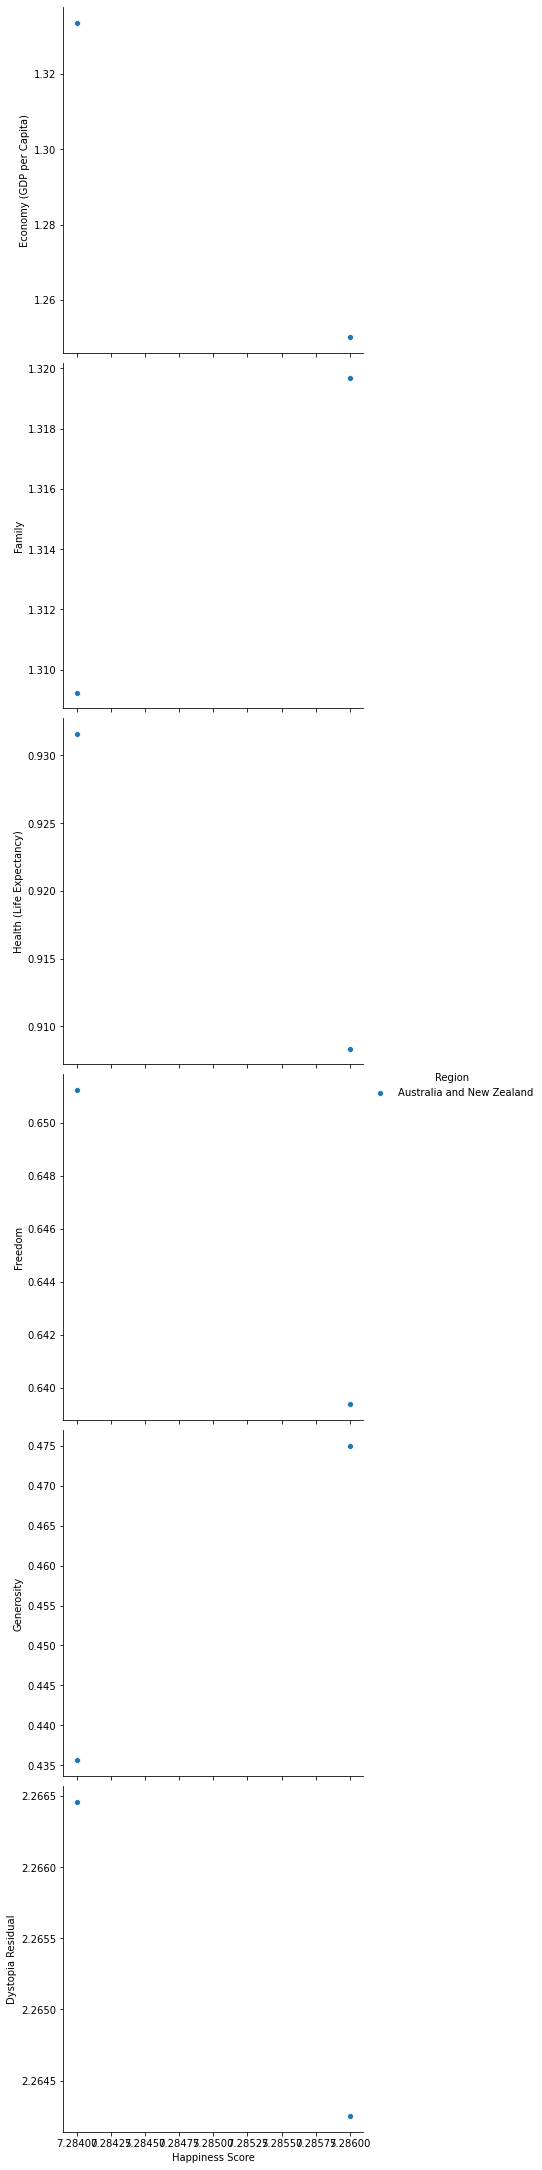

In [101]:
sns.pairplot(data=WHR_A_NZ, size = 5, hue='Region',
                  x_vars=['Happiness Score'],
                  y_vars=['Economy (GDP per Capita)', 'Family','Health (Life Expectancy)', 'Freedom', 'Generosity', 'Dystopia Residual'])

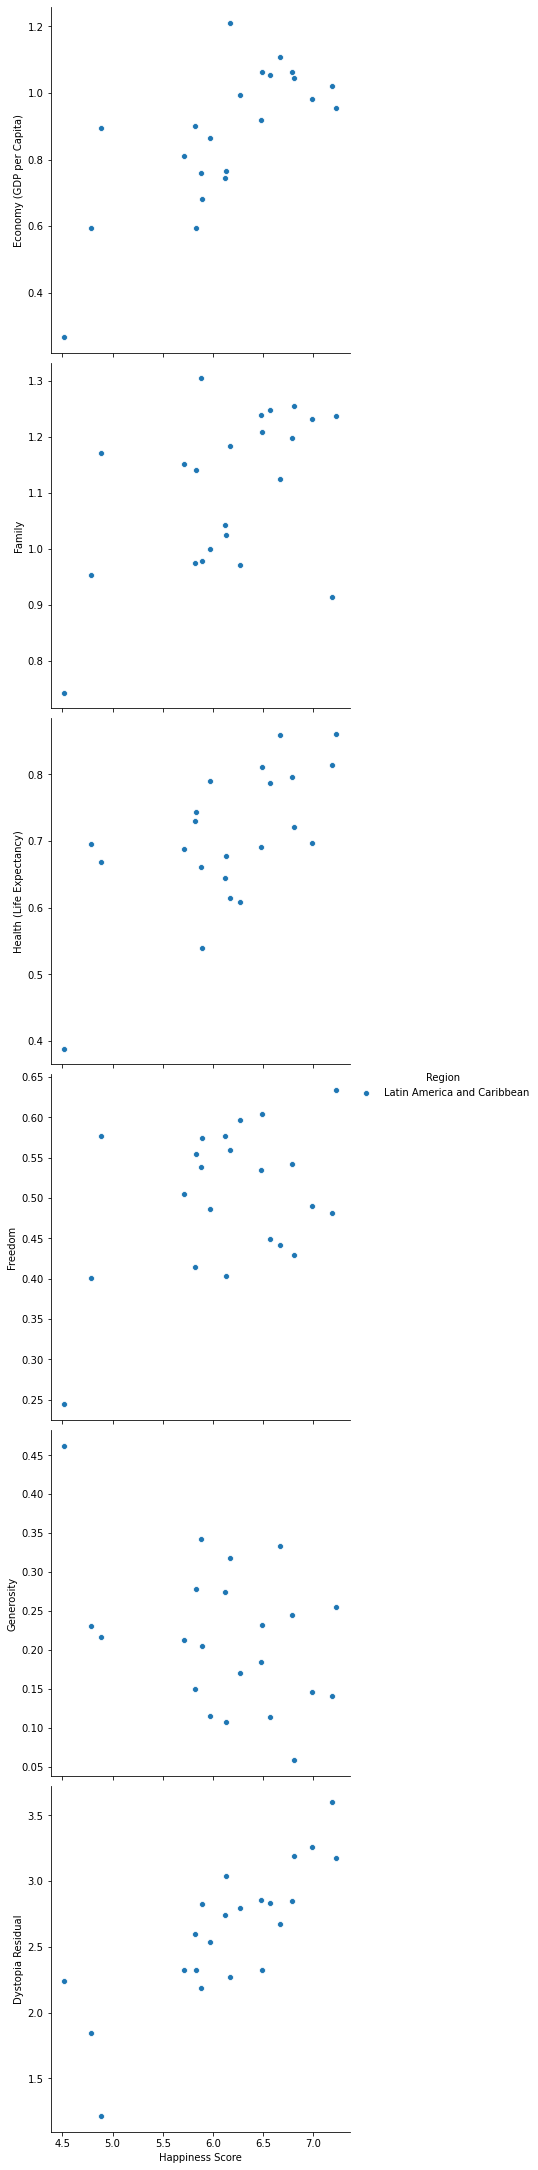

In [102]:
sns.pairplot(data=WHR_LA_C, size = 5, hue='Region',
                  x_vars=['Happiness Score'],
                  y_vars=['Economy (GDP per Capita)', 'Family','Health (Life Expectancy)', 'Freedom', 'Generosity', 'Dystopia Residual'])

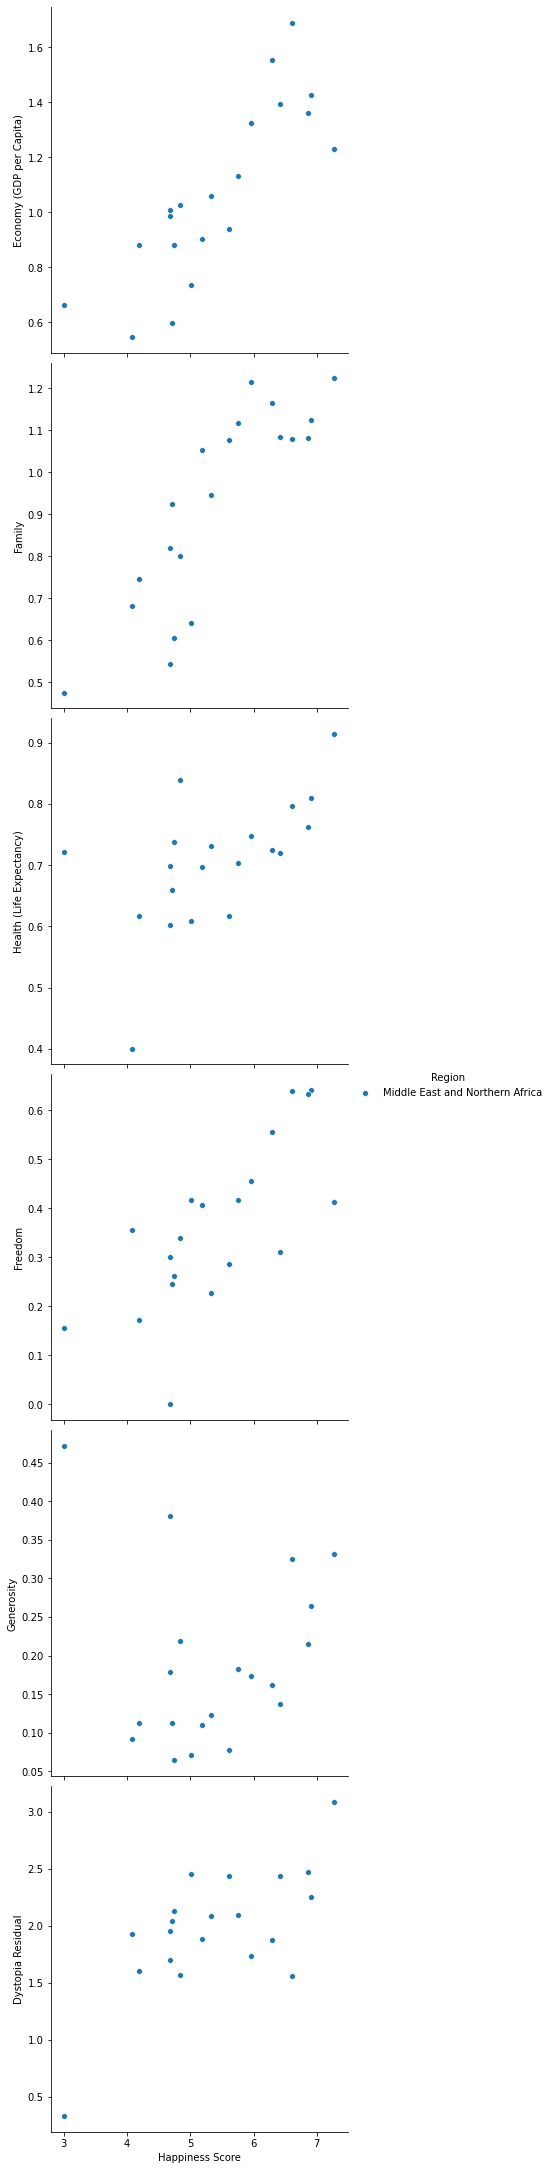

In [103]:
sns.pairplot(data=WHR_ME_N_AF, size = 5, hue='Region',
                  x_vars=['Happiness Score'],
                  y_vars=['Economy (GDP per Capita)', 'Family','Health (Life Expectancy)', 'Freedom', 'Generosity', 'Dystopia Residual'])

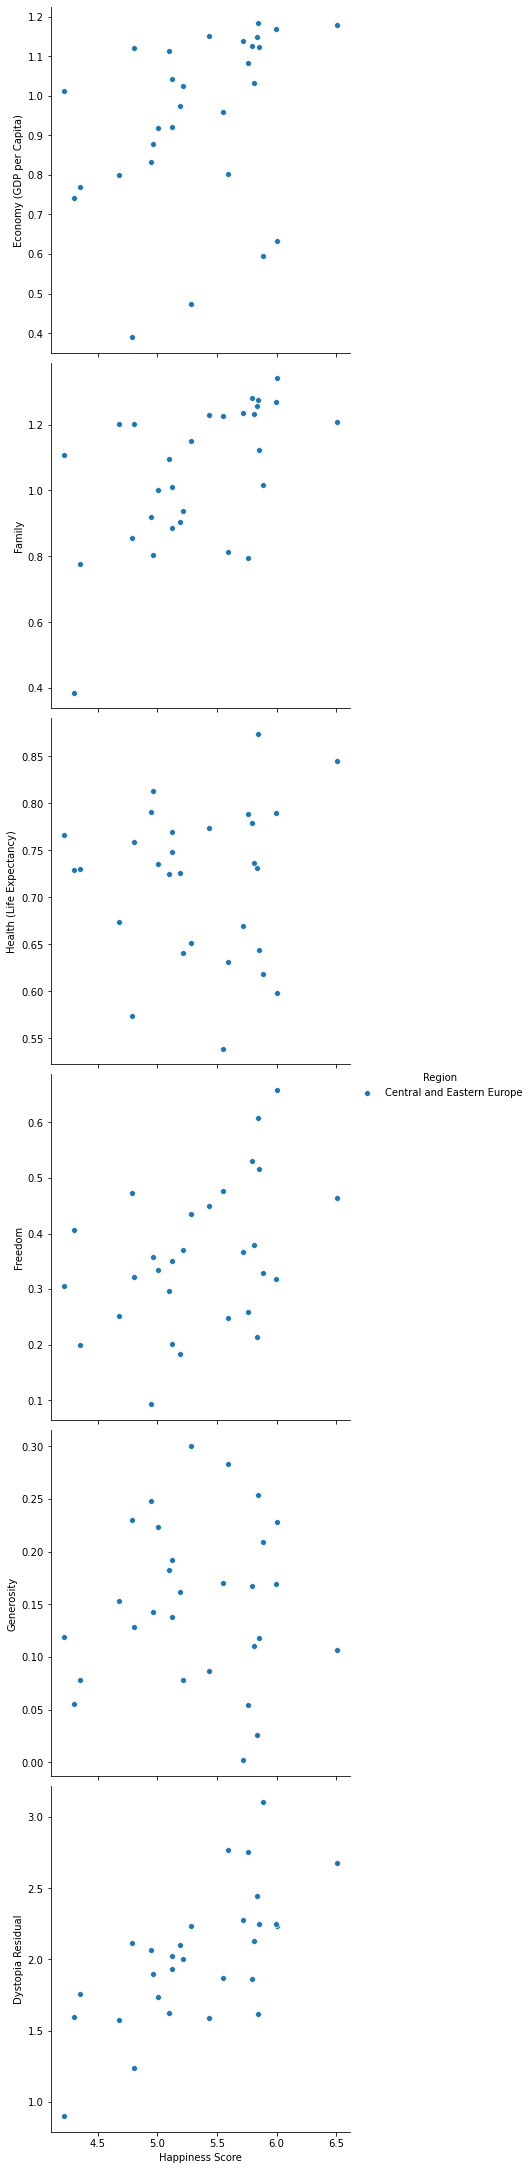

In [104]:
sns.pairplot(data=WHR_C_EE, size = 5, hue='Region',
                  x_vars=['Happiness Score'],
                  y_vars=['Economy (GDP per Capita)', 'Family','Health (Life Expectancy)', 'Freedom', 'Generosity', 'Dystopia Residual'])

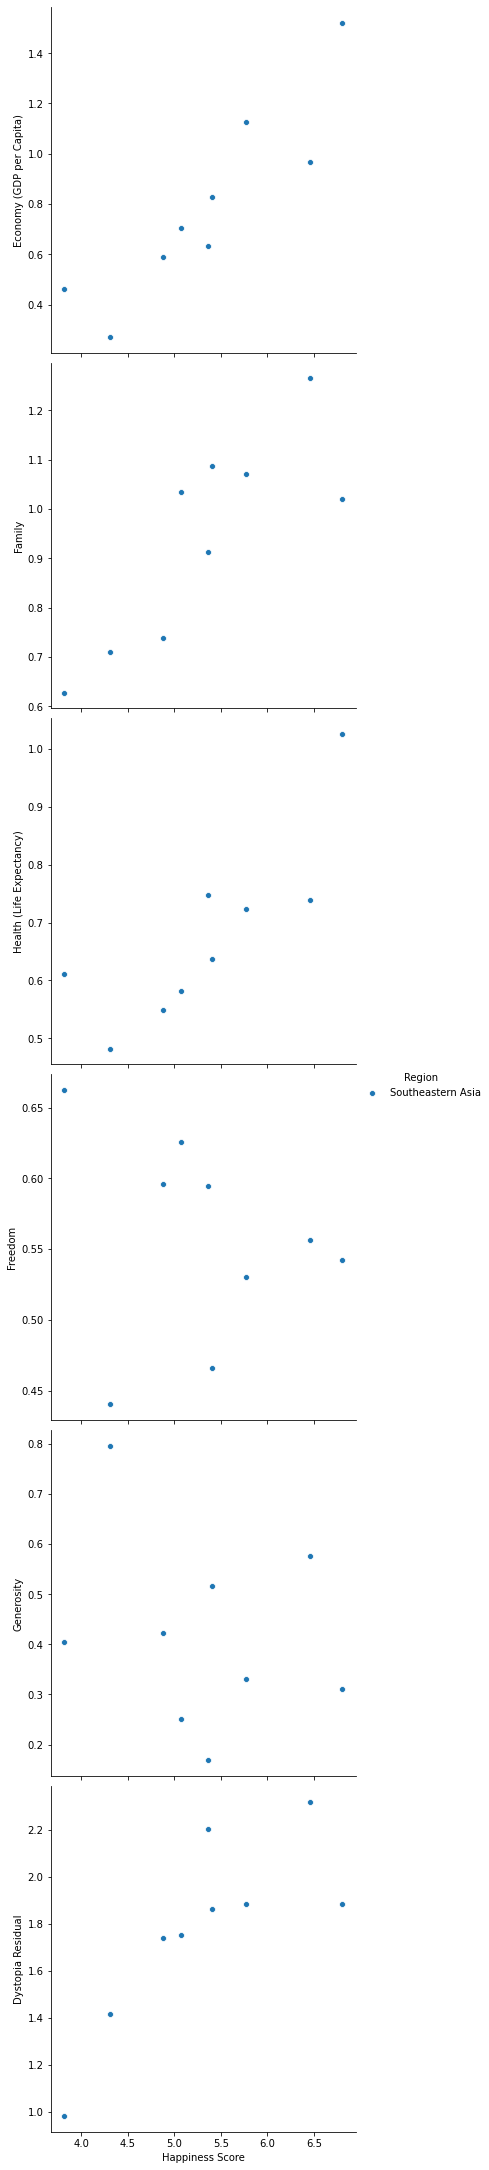

In [105]:
sns.pairplot(data=WHR_SE_A, size = 5, hue='Region',
                  x_vars=['Happiness Score'],
                  y_vars=['Economy (GDP per Capita)', 'Family','Health (Life Expectancy)', 'Freedom', 'Generosity', 'Dystopia Residual'])

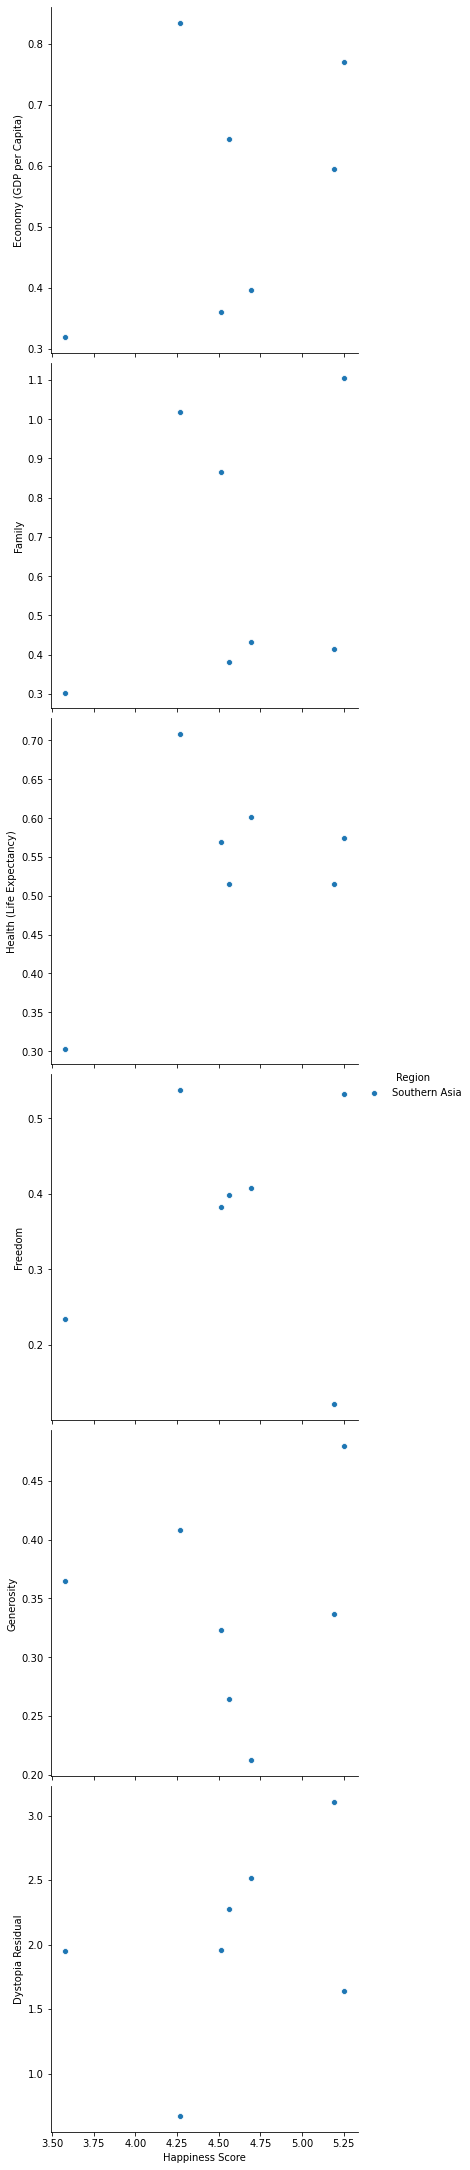

In [106]:
sns.pairplot(data=WHR_SA, size = 5, hue='Region',
                  x_vars=['Happiness Score'],
                  y_vars=['Economy (GDP per Capita)', 'Family','Health (Life Expectancy)', 'Freedom', 'Generosity', 'Dystopia Residual'])

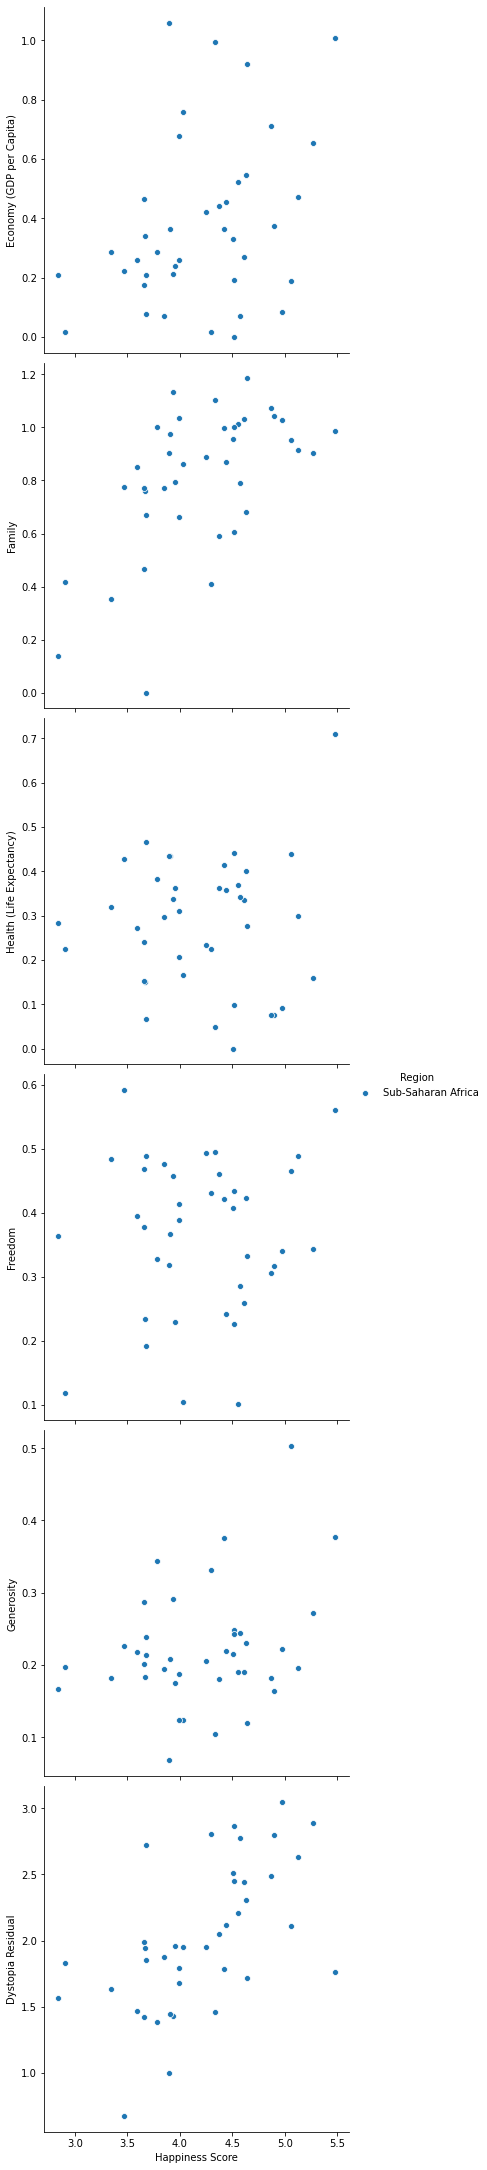

In [107]:
sns.pairplot(data=WHR_S_S_AF, size = 5, hue='Region',
                  x_vars=['Happiness Score'],
                  y_vars=['Economy (GDP per Capita)', 'Family','Health (Life Expectancy)', 'Freedom', 'Generosity', 'Dystopia Residual'])

In [108]:
#Correlation

In [109]:
WHR.corr(method="pearson", min_periods=20)["Happiness Score"].sort_values(ascending=False)

Happiness Score                  1.000000
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Dystopia Residual                0.530474
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Standard Error                  -0.177254
Happiness Rank                  -0.992105
Name: Happiness Score, dtype: float64

In [110]:
WHR.corr(method="pearson", min_periods=20)["Happiness Score"].abs().sort_values(ascending=False)

Happiness Score                  1.000000
Happiness Rank                   0.992105
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Dystopia Residual                0.530474
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Standard Error                   0.177254
Name: Happiness Score, dtype: float64

In [111]:
WHR.corr(method="pearson", min_periods=20)

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


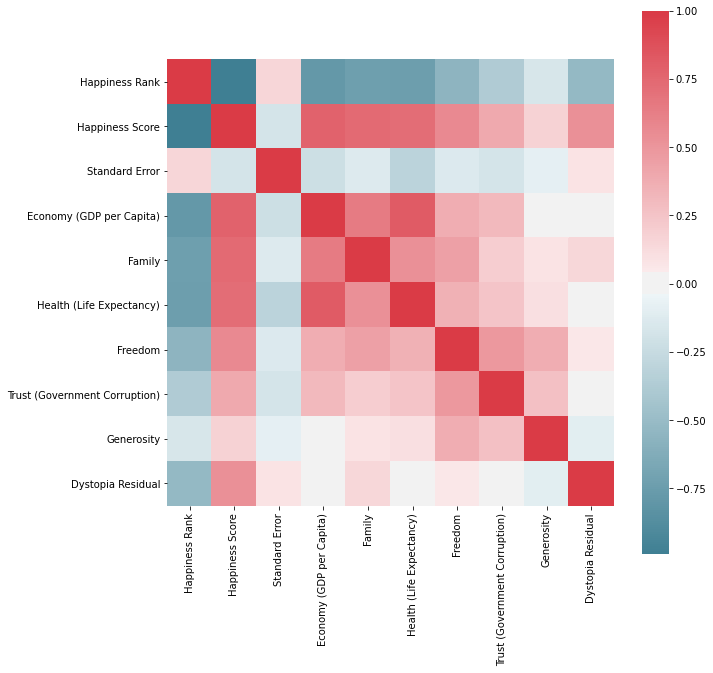

In [112]:
corr = WHR.corr(method = "pearson")

f, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)

In [114]:
#Probability

In [115]:
WHR[WHR['Happiness Score'] > 6].shape[0]

44

In [116]:
WHR[(WHR['Happiness Score'] > 6) & (WHR['Region'] == 'Western Europe')].shape[0]

16

In [117]:
float(len(WHR[(WHR['Happiness Score'] > 6) & (WHR['Region'] == 'Western Europe')]))/float(len(WHR[WHR['Happiness Score'] > 6]))

0.36363636363636365

In [118]:
print("The probability that a randomly selected country with happiness score over 6.0 is form Western Europe is {0:.0%}".format(float(WHR[(WHR['Happiness Score'] > 6) & (WHR['Region'] == 'Western Europe')].shape[0]

)/float(WHR[WHR['Happiness Score'] > 6].shape[0])))

The probability that a randomly selected country with happiness score over 6.0 is form Western Europe is 36%


In [119]:
#Matrices

In [121]:
WHR.shape

(158, 11)

In [128]:
Australia_New_Zealand = []
North_America = []
Western_Europe = []
Latin_America_Caribbean = []
Middle_East_Northern_Africa = []
Central_Eastern_Europe = []
Southeastern_Asia = []
Southern_Asia = []
Sub_Saharan_Africa = []

In [139]:
for x in WHR['Region']:
    if x == 'Australia_New_Zealand':
         Australia_New_Zealand.append(1)
    else: Australia_New_Zealand.append(0)

In [130]:
for x in WHR['Region']:
    if x == 'North_America':
         North_America.append(1)
    else: North_America.append(0)

In [131]:
for x in WHR['Region']:
    if x == 'Western_Europe':
         Western_Europe.append(1)
    else: Western_Europe.append(0)

In [140]:
for x in WHR['Region']:
    if x == 'Latin_America_Caribbean':
         Latin_America_Caribbean.append(1)
    else: Latin_America_Caribbean.append(0)

In [141]:
for x in WHR['Region']:
    if x == 'Middle_East_Northern_Africa':
         Middle_East_Northern_Africa.append(1)
    else: Middle_East_Northern_Africa.append(0)

In [142]:
for x in WHR['Region']:
    if x == 'Central_Eastern_Europe':
         Central_Eastern_Europe.append(1)
    else: Central_Eastern_Europe.append(0)

In [135]:
for x in WHR['Region']:
    if x == 'Southeastern_Asia':
         Southeastern_Asia.append(1)
    else: Southeastern_Asia.append(0)

In [143]:
for x in WHR['Region']:
    if x == 'Southern_Asia':
         Southern_Asia.append(1)
    else: Southern_Asia.append(0)

In [144]:
for x in WHR['Region']:
    if x == 'Sub_Saharan_Africa':
         Sub_Saharan_Africa.append(1)
    else: Sub_Saharan_Africa.append(0)

In [145]:
Matrix = pd.DataFrame(index=WHR.index)

In [153]:
Matrix.head(20)

,Australia and New Zealand
Country,
Switzerland,0
Iceland,0
Denmark,0
Norway,0
Canada,0
Finland,0
Netherlands,0
Sweden,0
New Zealand,0
